## 1. Requeriments

In [113]:
# import torch
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

## 2. Import libraries

In [114]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import pandas as pd
from sklearn import preprocessing
import random
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader

## 3. Graph building

### 3.1. Gene matrix

In [115]:
genes = pd.read_csv('../Biogrid/Data/mrcc_protein_matrix.csv')
Y = genes.Y

genes = genes.iloc[:,1:26] 
genes

,ARAP1,CUL3,DLGAP4,EGFR,FPR2,GJA9,GPR155,GRB2,IL25,KLHL5,...,RNF123,RNPS1,SDR42E1,SRPK2,TARBP2,TRIM25,TRIM43B,UBC,USP31,XPC
0,34.778072,32.41114,34.54982,34.66442,23.31461,29.68286,31.81161,35.06760,21.08036,33.45578,...,33.24403,34.71048,30.26124,32.20619,29.60417,32.61049,21.9744,39.76191,32.00348,32.24472
1,34.137558,33.78153,34.06647,35.04555,26.77815,26.80539,31.42781,34.56841,21.08036,34.03090,...,32.93945,34.56276,29.12730,32.73181,29.61188,33.35035,21.9744,40.32706,32.11090,32.15619
2,34.240182,34.25556,34.42561,35.03537,31.33380,30.09292,30.47292,36.01318,21.08036,31.97097,...,33.15722,34.41174,27.22907,34.06143,31.90343,34.11570,21.9744,40.85312,30.98575,31.86536
3,34.077602,33.82623,34.41176,35.12911,29.45497,29.29223,30.72903,35.21336,21.08036,33.79569,...,32.99944,34.57809,22.83731,32.88583,30.35424,32.61024,21.9744,40.33974,32.36353,31.63561
4,34.663076,34.87586,34.29088,35.68321,23.31461,32.00382,31.16114,35.37475,21.08036,33.87798,...,34.04944,35.57754,22.83731,33.61440,31.60946,34.02714,21.9744,40.28643,30.43196,33.12717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,33.121350,33.71060,34.55658,35.90468,27.77094,28.18967,29.90347,34.04756,21.43715,33.24384,...,34.15189,34.93992,31.49914,33.87853,31.57179,33.28910,22.3863,39.58054,32.00141,32.70183
177,35.264000,34.89118,33.15506,33.23884,29.99632,28.18967,31.66030,35.28814,21.43715,33.77807,...,31.75215,32.95477,28.17083,33.39445,34.36199,31.41810,22.3863,38.08709,31.32892,30.79817
178,33.777504,33.46728,34.68047,35.20723,29.69215,28.18967,31.92039,35.31580,21.43715,34.28987,...,34.11156,34.49169,24.22162,33.68642,29.30238,33.33372,22.3863,40.76723,31.34410,32.60750
179,33.922628,33.03798,35.60014,36.44440,21.88688,33.92530,32.78760,34.28260,21.43715,33.32866,...,33.48454,34.69895,27.21929,32.93499,30.72343,33.89416,22.3863,40.23050,32.39718,33.35291


In [116]:
scaler = preprocessing.MinMaxScaler()
names = genes.columns
d = scaler.fit_transform(genes)
genes = pd.DataFrame(d, columns=names)
genes

,ARAP1,CUL3,DLGAP4,EGFR,FPR2,GJA9,GPR155,GRB2,IL25,KLHL5,...,RNF123,RNPS1,SDR42E1,SRPK2,TARBP2,TRIM25,TRIM43B,UBC,USP31,XPC
0,0.664135,0.283275,0.460202,0.448186,0.388440,0.635056,0.633846,0.503390,0.021832,0.545698,...,0.421257,0.637742,0.790347,0.203042,0.593083,0.315845,0.077107,0.438217,0.704605,0.395122
1,0.512746,0.679314,0.314008,0.513990,0.620794,0.424069,0.551284,0.371816,0.021832,0.714264,...,0.335253,0.594837,0.700462,0.358760,0.593743,0.511822,0.077107,0.560259,0.725331,0.370940
2,0.537002,0.816308,0.422634,0.512233,0.926412,0.665123,0.345871,0.752620,0.021832,0.110506,...,0.396744,0.550974,0.549992,0.752668,0.789730,0.714551,0.077107,0.673860,0.508236,0.291501
3,0.498575,0.692232,0.418445,0.528417,0.800370,0.606413,0.400965,0.541808,0.021832,0.645324,...,0.352193,0.599290,0.201863,0.404389,0.657234,0.315779,0.077107,0.562997,0.774076,0.228745
4,0.636955,0.995573,0.381883,0.624086,0.388440,0.805237,0.493919,0.584346,0.021832,0.669443,...,0.648677,0.889578,0.201863,0.620233,0.764588,0.691092,0.077107,0.551485,0.401383,0.636162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.272560,0.658816,0.462247,0.662324,0.687396,0.525569,0.223373,0.234533,0.059321,0.483579,...,0.677606,0.704382,0.888474,0.698483,0.761366,0.495598,0.101726,0.399050,0.704205,0.519981
177,0.778986,1.000000,0.038343,0.202051,0.836686,0.525569,0.601296,0.561518,0.059321,0.640160,...,0.000000,0.127800,0.624643,0.555071,1.000000,0.000000,0.101726,0.076545,0.574450,0.000000
178,0.427645,0.588497,0.499719,0.541905,0.816281,0.525569,0.657246,0.568809,0.059321,0.790167,...,0.666218,0.574195,0.311595,0.641569,0.567273,0.507417,0.101726,0.655312,0.577379,0.494215
179,0.461946,0.464430,0.777882,0.755510,0.292661,0.946128,0.843797,0.296484,0.059321,0.508440,...,0.489168,0.634393,0.549216,0.418953,0.688809,0.655868,0.101726,0.539407,0.780568,0.697822


In [117]:
train_genes, test_genes, Y_train, Y_test = train_test_split(genes, Y, test_size=0.1, stratify=Y)

### 3.2. Graph edges

In [118]:
path ='../Biogrid/Data/network_edges.tsv'
data = pd.read_csv(path, delimiter='\t')
edge_index1=data[data.columns[1]].to_numpy()
edge_index2=data[data.columns[2]].to_numpy()

In [119]:
edge_index = np.concatenate((edge_index1, edge_index2))

In [120]:
edge_index

array(['EGFR', 'EGFR', 'GRB2', 'MAP1LC3B', 'DLGAP4', 'TRIM25', 'XPC',
       'NPM1', 'UBC', 'EGFR', 'KLHL5', 'CUL3', 'PCMT1', 'RNF123',
       'DLGAP4', 'UBC', 'GPR155', 'FPR2', 'ARAP1', 'XPC', 'RNPS1',
       'SRPK2', 'GRB2', 'GRB2', 'GRB2', 'IL25', 'MAP1LC3B', 'KLHL5',
       'TRIM25', 'LANCL1-AS1', 'NPM1', 'LEMD1', 'PCMT1', 'USP31', 'CUL3',
       'TARBP2', 'RNF123', 'TRIM43B', 'UBC', 'XPC', 'FPR2', 'ARAP1',
       'GRB2', 'RNPS1', 'SRPK2', 'SDR42E1', 'GJA9', 'UBC'], dtype=object)

In [121]:
le = preprocessing.LabelEncoder()
le.fit(edge_index)
len(list(le.classes_))

25

In [122]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [123]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [124]:
edge_index

array([[ 3,  3,  7, 12,  2, 20, 24, 13, 22,  3,  9,  1, 14, 15,  2, 22,
         6,  4,  0, 24, 16, 18,  7,  7],
       [ 7,  8, 12,  9, 20, 10, 13, 11, 14, 23,  1, 19, 15, 21, 22, 24,
         4,  0,  7, 16, 18, 17,  5, 22]])

In [125]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[ 3,  3,  7, 12,  2, 20, 24, 13, 22,  3,  9,  1, 14, 15,  2, 22,  6,  4,
          0, 24, 16, 18,  7,  7],
        [ 7,  8, 12,  9, 20, 10, 13, 11, 14, 23,  1, 19, 15, 21, 22, 24,  4,  0,
          7, 16, 18, 17,  5, 22]])

### 3.3. Create dataset

In [126]:
train_data=[]
for g in range(len(train_genes)):
  b=[]
  for i in train_genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    # a.append(i*100)
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float).reshape([-1,1])
  edge_index = edge_index
  y = torch.tensor([Y_train.iloc[g]], dtype=torch.long).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  train_data.append(data)

print(len(train_data))

162


In [127]:
test_data=[]
for g in range(len(test_genes)):
  b=[]
  for i in test_genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    # a.append(i*100)
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float).reshape([-1,1])
  edge_index = edge_index
  y = torch.tensor([Y_test.iloc[g]], dtype=torch.long).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  test_data.append(data)

print(len(test_data))

19


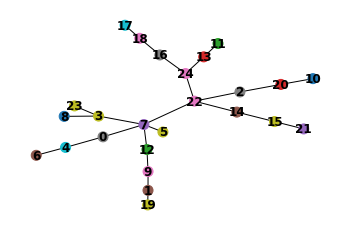

In [128]:
def plot_graph(data,description=True):
    edges_raw = data.edge_index.numpy()
    edges = [(x, y) for x, y in zip(edges_raw[0, :], edges_raw[1, :])]
    labels = data.x.numpy()
    G = nx.Graph()
    G.add_nodes_from(list(range(np.max(edges_raw))))
    G.add_edges_from(edges)
    plt.subplot(111)
    options = {
       'node_size': 100,
       'width': 1,
    }
    nx.draw(G, with_labels=description, node_color=labels.tolist(), cmap=plt.cm.tab10, font_weight='bold', **options)
    plt.show()

plot_graph(data,True)

### 3.4. Patient sample

In [129]:
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Number of node features: {data.num_node_features}')


Number of nodes: 25
Number of charcateristics per node: 1
Number of edges: 24
Average node degree: 0.96
Has isolated nodes: False
Has self-loops: False
Is undirected: False
Number of node features: 1


## 4. Graph training

### 4.2. Training and testing the model

In [130]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GraphConv
from torch_geometric.nn import SAGPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
from torch import nn

In [131]:
# import torch
# import torch.nn.functional as F
# from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
# from torch_geometric.nn import GCNConv, GINConv
# from torch_geometric.nn import global_mean_pool, global_add_pool
# embed_dim = 32

# class Net(torch.nn.Module):
#     def __init__(self, dim_h):
#         super(Net, self).__init__()
#         self.conv1 = GCNConv(1, dim_h)
#         self.conv2 = GCNConv(dim_h, dim_h)
#         self.conv3 = GCNConv(dim_h, dim_h)
#         self.lin = Linear(dim_h, 1)

#     def forward(self, x, edge_index, batch):
#         # Node embeddings 
#         h = self.conv1(x, edge_index)
#         h = h.relu()
#         h = self.conv2(h, edge_index)
#         h = h.relu()
#         h = self.conv3(h, edge_index)

#         # Graph-level readout
#         hG = global_mean_pool(h, batch)

#         # Classifier
#         h = F.dropout(hG, p=0.5, training=self.training)
#         h = self.lin(h)
        
#         return F.sigmoid(h).squeeze(1)


In [132]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool

class GIN(torch.nn.Module):
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(1, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, 2)

    def forward(self, x, edge_index, batch):
        # Node embeddings 
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)
        
        return F.log_softmax(h, dim=1)

In [133]:
from sklearn.metrics import f1_score

def train(model, train_loader, optimizer, criterion):
    total_loss = 0
    acc = 0
    for data in train_loader:
        optimizer.zero_grad()
        output = model(data.x, data.edge_index, data.batch)
        loss = criterion(output, data.y.squeeze(1))  
        total_loss += loss / len(train_loader)
        acc += accuracy(output.argmax(dim=1), data.y.squeeze(1)) / len(train_loader)
        f1score = f1_score(data.y.squeeze(1), output.argmax(dim=1), average='weighted')
        loss.backward()
        optimizer.step()
        # loss_all += loss.item() * data.num_graphs
    return total_loss, acc, f1score

    
@torch.no_grad()
def validation(model, val_loader, criterion):
    model.eval()
    acc = 0
    loss = 0
    for data in val_loader:
        output = model(data.x, data.edge_index, data.batch)
        loss += criterion(output, data.y.squeeze(1))/ len(val_loader)
        acc += accuracy(output.argmax(dim=1), data.y.squeeze(1)) / len(val_loader)
        f1score = f1_score(data.y.squeeze(1), output.argmax(dim=1), average='weighted')
    return loss, acc, f1score

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

def test(model, test_data):
    acc = 0
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
    for data in test_loader:
        output = model(data.x, data.edge_index, data.batch)
        acc += accuracy(output.argmax(dim=1), data.y.squeeze(1)) / len(test_loader)
        f1score = f1_score(data.y.squeeze(1), output.argmax(dim=1), average='weighted')
    return acc, f1score


In [134]:
from sklearn.model_selection import StratifiedKFold # import KFold
kf=StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

TRAIN:  [ 16  17  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18]
145
17
Epoch: 000, Train loss: 0.9968, Train Acc: 0.4934, Train f1-score: 0.3665, Val loss: 0.7184, Val Acc: 0.5294, Val f1-score: 0.3665,
Epoch: 001, Train loss: 0.7447, Train Acc: 0.5184, Train f1-score: 0.3665, Val loss: 0.7040, Val Acc: 0.4706, Val f1-score: 0.3012,
Epoch: 002, Train loss: 0.6961, Train Acc: 0.5559, Train f1-score: 0.366

No handles with labels found to put in legend.


GIN accuracy: 0.5789473652839661
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  18  33
  34  35  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161] TEST: [16 17 19 20 21 22 23 24 25 26 27 28 29 30 31 32 36]
145
17
Epoch: 000, Train loss: 1.3942, Train Acc: 0.5184, Train f1-score: 0.3665, Val loss: 0.7896, Val Acc: 0.4706, Val f1-score: 0.3012,
Epoch: 001, Train loss: 0.7488, Train Acc: 0.5309, Train f1-score: 0.3665, Val loss: 0.6921, Val Acc: 0.5294, Val f1-score: 0.4759,
Epoch: 002, Train loss: 0.6940, Train A

No handles with labels found to put in legend.


Epoch: 095, Train loss: 0.6543, Train Acc: 0.5676, Train f1-score: 0.4858, Val loss: 0.7185, Val Acc: 0.4118, Val f1-score: 0.3449,
Epoch: 096, Train loss: 0.6552, Train Acc: 0.6154, Train f1-score: 0.7647, Val loss: 0.7240, Val Acc: 0.5882, Val f1-score: 0.5394,
Epoch: 097, Train loss: 0.6713, Train Acc: 0.5614, Train f1-score: 0.4858, Val loss: 0.7205, Val Acc: 0.4706, Val f1-score: 0.4318,
Epoch: 098, Train loss: 0.6479, Train Acc: 0.5482, Train f1-score: 0.5853, Val loss: 0.7158, Val Acc: 0.4118, Val f1-score: 0.4077,
Epoch: 099, Train loss: 0.6493, Train Acc: 0.5801, Train f1-score: 0.4858, Val loss: 0.7266, Val Acc: 0.4118, Val f1-score: 0.3449,
Epoch: 100, Train loss: 0.6573, Train Acc: 0.6265, Train f1-score: 0.8798, Val loss: 0.7272, Val Acc: 0.5882, Val f1-score: 0.5394,
GIN accuracy: 0.5789473652839661
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  36  45  47
  48  50  51  52  53 

No handles with labels found to put in legend.


Epoch: 097, Train loss: 0.6481, Train Acc: 0.6056, Train f1-score: 0.7778, Val loss: 0.7236, Val Acc: 0.6875, Val f1-score: 0.6672,
Epoch: 098, Train loss: 0.6425, Train Acc: 0.5694, Train f1-score: 0.7196, Val loss: 0.7287, Val Acc: 0.6250, Val f1-score: 0.6125,
Epoch: 099, Train loss: 0.6547, Train Acc: 0.6090, Train f1-score: 0.8860, Val loss: 0.7500, Val Acc: 0.6875, Val f1-score: 0.6672,
Epoch: 100, Train loss: 0.6577, Train Acc: 0.6104, Train f1-score: 0.8317, Val loss: 0.7236, Val Acc: 0.5625, Val f1-score: 0.5572,
GIN accuracy: 0.4736842215061188
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  46  49  54  55  56  58  61  62  67
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 1

No handles with labels found to put in legend.


Epoch: 097, Train loss: 0.6587, Train Acc: 0.5792, Train f1-score: 0.8250, Val loss: 0.6373, Val Acc: 0.6875, Val f1-score: 0.6837,
Epoch: 098, Train loss: 0.6577, Train Acc: 0.5729, Train f1-score: 0.8250, Val loss: 0.6485, Val Acc: 0.5625, Val f1-score: 0.5572,
Epoch: 099, Train loss: 0.6573, Train Acc: 0.5917, Train f1-score: 0.8250, Val loss: 0.6610, Val Acc: 0.5625, Val f1-score: 0.5572,
Epoch: 100, Train loss: 0.6585, Train Acc: 0.5917, Train f1-score: 0.8250, Val loss: 0.6381, Val Acc: 0.5625, Val f1-score: 0.5572,
GIN accuracy: 0.4736842215061188
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  59  60  63  64  65  66  68  69  76  77  78  79  80  81
  83  84  86  88  89  92  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 1

No handles with labels found to put in legend.


GIN accuracy: 0.6315789222717285
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  82  84  85  86  87  88  89  90  91  92  93  95  97  99
 101 105 106 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161] TEST: [ 76  77  78  79  80  81  83  94  96  98 100 102 103 104 107 108]
146
16
Epoch: 000, Train loss: 1.0767, Train Acc: 0.4424, Train f1-score: 0.5440, Val loss: 0.7496, Val Acc: 0.4375, Val f1-score: 0.2663,
Epoch: 001, Train loss: 0.7584, Train Acc: 0.5049, Train f1-score: 0.3968, Val loss: 0.6861, Val Acc: 0.5625, Val f1-score: 0.4050,
Epoch: 002, Train loss

No handles with labels found to put in legend.


Epoch: 097, Train loss: 0.6493, Train Acc: 0.6208, Train f1-score: 0.6051, Val loss: 0.6966, Val Acc: 0.5625, Val f1-score: 0.5642,
Epoch: 098, Train loss: 0.6598, Train Acc: 0.6118, Train f1-score: 0.7593, Val loss: 0.7036, Val Acc: 0.4375, Val f1-score: 0.4307,
Epoch: 099, Train loss: 0.6535, Train Acc: 0.6431, Train f1-score: 0.7593, Val loss: 0.7042, Val Acc: 0.5000, Val f1-score: 0.5000,
Epoch: 100, Train loss: 0.6511, Train Acc: 0.6493, Train f1-score: 0.7593, Val loss: 0.7167, Val Acc: 0.6250, Val f1-score: 0.5841,
GIN accuracy: 0.3684210479259491
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  85  87  90  91  93  94
  96  98 100 101 102 103 104 105 106 107 108 112 115 118 120 121 1

No handles with labels found to put in legend.


GIN accuracy: 0.5789473652839661
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 102 103 104 107 108 109 110
 111 113 114 116 117 119 126 130 131 132 133 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161] TEST: [101 105 106 112 115 118 120 121 122 123 124 125 127 128 129 134]
146
16
Epoch: 000, Train loss: 1.1555, Train Acc: 0.5396, Train f1-score: 0.6051, Val loss: 0.6996, Val Acc: 0.5000, Val f1-score: 0.3333,
Epoch: 001, Train loss: 0.7408, Train Acc: 0.5361, Train f1-score: 0.3968, Val loss: 0.7011, Val Acc: 0.5000, Val f1-score: 0.3333,
Epoch: 002, Train loss

No handles with labels found to put in legend.


Epoch: 100, Train loss: 0.6643, Train Acc: 0.5799, Train f1-score: 0.5185, Val loss: 0.7381, Val Acc: 0.5000, Val f1-score: 0.4921,
GIN accuracy: 0.6315789222717285
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 127 128 129 134 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161] TEST: [126 130 131 132 133 135 136 137 138 139 140 141 142 143 144 145]
146
16
Epoch: 000, Train loss: 1.3907, Train Acc: 0.5035, Train f1-score: 0.5103, Val loss: 0.6935, Val Acc: 0.5000, Val f1-score: 0.3333,
Epoch: 001, Train loss

No handles with labels found to put in legend.


Epoch: 100, Train loss: 0.6582, Train Acc: 0.5986, Train f1-score: 0.3968, Val loss: 0.6940, Val Acc: 0.5625, Val f1-score: 0.5608,
GIN accuracy: 0.42105263471603394
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145] TEST: [146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161]
146
16
Epoch: 000, Train loss: 1.1555, Train Acc: 0.4972, Train f1-score: 0.4636, Val loss: 0.7058, Val Acc: 0.5000, Val f1-score: 0.3333,
Epoch: 001, Train los

No handles with labels found to put in legend.


Epoch: 099, Train loss: 0.6686, Train Acc: 0.6222, Train f1-score: 0.6148, Val loss: 0.6444, Val Acc: 0.5000, Val f1-score: 0.4667,
Epoch: 100, Train loss: 0.6774, Train Acc: 0.6083, Train f1-score: 0.6667, Val loss: 0.6470, Val Acc: 0.5000, Val f1-score: 0.4182,
GIN accuracy: 0.4736842215061188
Val accuracy: 0.5676470637321472
Test accuracy: 0.5210526287555695
Test f1-score: 0.4918998907271218
Val stv: 0.056841613807589425
Test stv: 0.0863221993234783


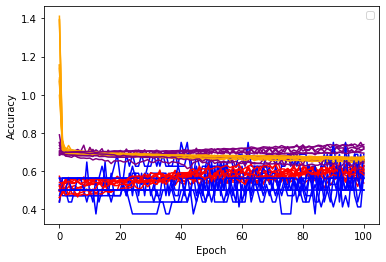

In [135]:
val_avg = []
test_avg = []
test_f1_score = []
for train_index, val_index in kf.split(train_data, Y_train):
    train_dataset=[]
    val_dataset=[]
    print("TRAIN: ", train_index, "TEST:", val_index)
    for i in train_index:
        train_dataset.append(train_data[i])
    for i in val_index:
        val_dataset.append(train_data[i])

    print(len(train_dataset))
    print(len(val_dataset))

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    model = GIN(dim_h=32)
    model.train()
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.6)
    optimizer = torch.optim.Adadelta(model.parameters(), lr=0.7)
    train_epoch=[]
    val_epoch=[]
    train_loss_=[]
    val_loss_=[]
    epochs = 100
    train_acc=0
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs+1):
        train_loss, train_acc, train_f1score = train(model, train_loader, optimizer, criterion)
        val_loss, val_acc, val_f1score = validation(model, val_loader, criterion)

        train_loss = train_loss.detach().numpy()
        train_loss_.append(train_loss)
        val_loss_.append(val_loss.detach().numpy())
        train_epoch.append(train_acc)
        val_epoch.append(val_acc)
        
        print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f}, '
            f'Train Acc: {train_acc:.4f}, Train f1-score: {train_f1score:.4f}, Val loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val f1-score: {val_f1score:.4f},')

    test_acc, test_f1score = test(model, test_data)
    print("GIN accuracy: " + str(test_acc))

    # fig, (ax1, ax2) = plt.subplots(1, 2)
    # ax1.plot(train_epoch, color="red", label="train acc")
    # ax1.plot(val_epoch, color="blue", label="test acc")
    # ax2.plot(train_loss_, color="orange", label="train loss")
    # ax2.plot(val_loss_, color="purple", label="test acc")
    # ax1.set_xlabel("Epoch")
    # ax1.set_ylabel("Accuracy")
    # ax2.set_xlabel("Epoch")
    # ax2.set_ylabel("Loss")
    # ax1.legend()
    # ax2.legend()

    plt.plot(train_epoch, color="red")
    plt.plot(val_epoch, color="blue")
    plt.plot(train_loss_, color="orange")
    plt.plot(val_loss_, color="purple")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    val_avg.append(val_acc)
    test_avg.append(test_acc)
    test_f1_score.append(test_f1score)

print('Val accuracy: '+ str(np.array(val_avg).mean()))
print('Test accuracy: '+ str(np.array(test_avg).mean()))
print('Test f1-score: '+ str(np.array(test_f1_score).mean()))

print('Val stv: '+ str(np.array(val_avg).std()))
print('Test stv: '+ str(np.array(test_avg).std()))

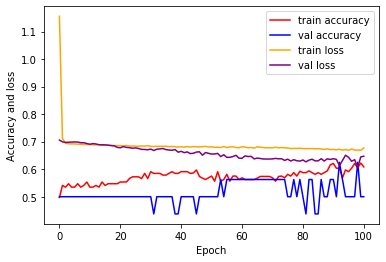

In [136]:
plt.plot(train_epoch, color="red", label="train accuracy")
plt.plot(val_epoch, color="blue", label="val accuracy")
plt.plot(train_loss_, color="orange", label="train loss")
plt.plot(val_loss_, color="purple", label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy and loss")
plt.legend()